In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [8]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Fetch the California housing dataset
california = fetch_california_housing()

# Create a DataFrame from the data and add the target (Price) column
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

# Print the first 5 rows of the DataFrame
print("Dataset (first 5 rows):\n", df.head())


Dataset (first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [12]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [14]:
df.isnull()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  Price  
0          False  False  
1          False  False  
2          False  False  
3          False  False  
4          False  False  
...          ...    ...  
20635      False  False  
20636      False  False  
20637      False  False  
20638      False  False  
20639      False  False  

[20640 rows x 9 columns]

In [16]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

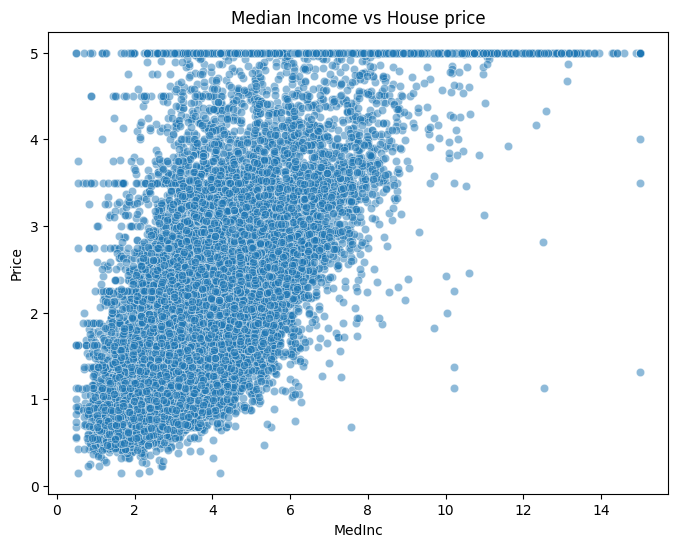

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='MedInc',y='Price',data=df,alpha=0.5)
plt.title('Median Income vs House price')
plt.show()

In [26]:
print("\nCorrelation with price:\n",df.corr()['Price'].sort_values())


Correlation with price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


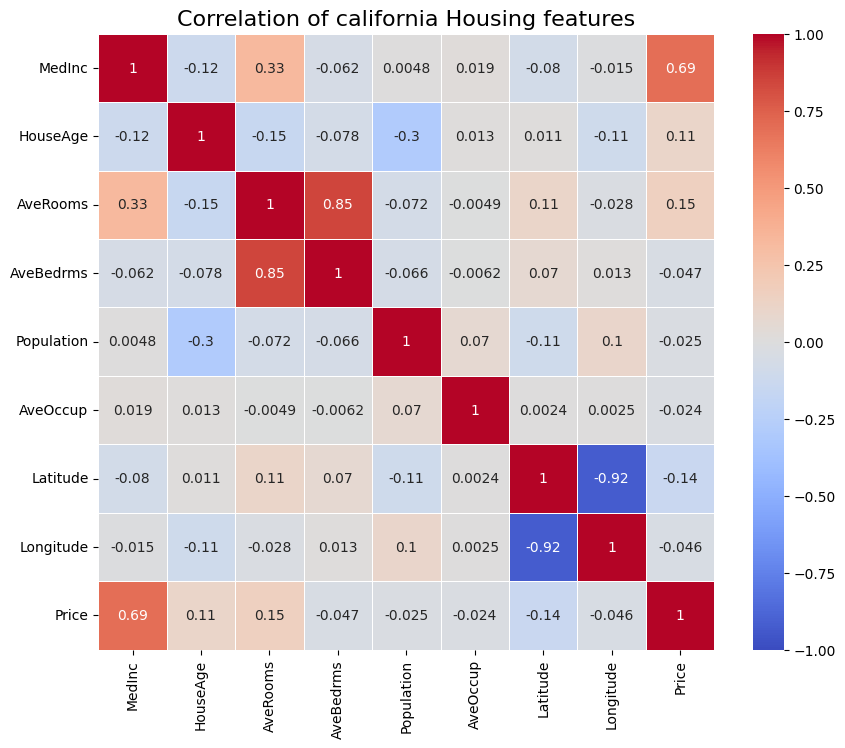

In [28]:
# calculating correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,8))  #size of the heatmap
sns.heatmap(corr_matrix, 
            annot=True,   #show numbers in squares
            cmap='coolwarm', #colorscheme(red=positive ,blue=negative)
            vmin=-1,vmax=1, # range of correlation values
            center=0,         # center color map at 0
            square=True,      # make squares  uniform
            linewidth=0.5)
plt.title("Correlation of california Housing features",fontsize=16)
plt.show()

In [44]:
#Prepare Data
X = df[['MedInc']]
y = df['Price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)
print(f"\nLinear Eqution: Price = {model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}")


Linear Eqution: Price = 0.42 * MedInc + 0.44


In [48]:
y_pred= model.predict(x_test)
mae= mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print(f"\nMAE : {mae :.2f} $100K")
print(f"\RMSE : {rmse :.2f} $100K")
print(f"R square : {r2:.2f}")


MAE : 0.63 $100K
\RMSE : 0.84 $100K
R square : 0.46


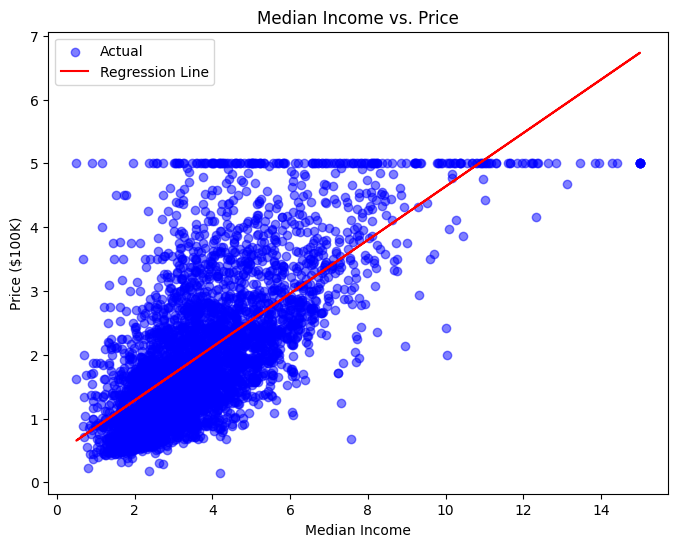

In [50]:
#Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_test,y_test, color='blue', label='Actual',alpha=0.5)
plt.plot(X_test,y_pred,color='red', label='Regression Line')
plt.title('Median Income vs. Price')
plt.xlabel('Median Income')
plt.ylabel('Price ($100K)')
plt.legend()
plt.show()